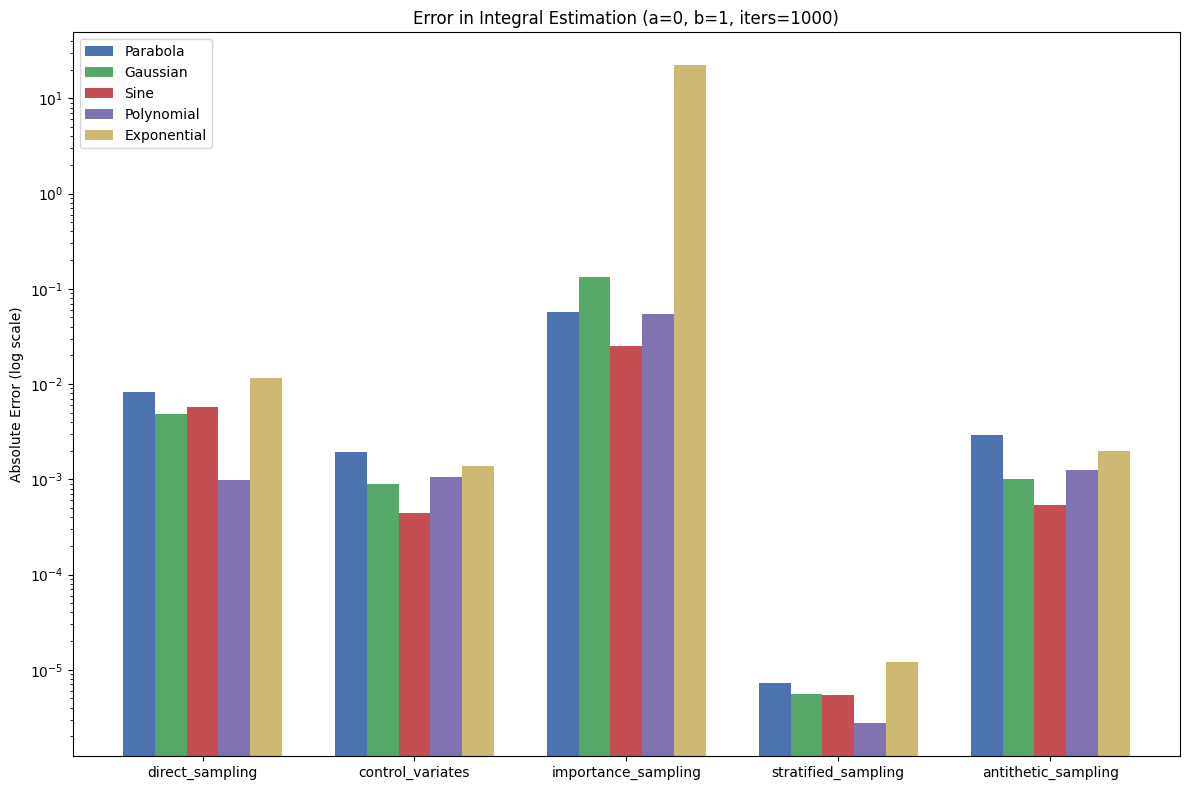

In [7]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from library import *

a, b = 0, 1
iters = 1000
methods = [
    direct_sampling,
    control_variates,
    importance_sampling,
    stratified_sampling,
    antithetic_sampling
]

functions = {
    "Parabola": lambda x: x**2,
    "Gaussian": lambda x: np.exp(-x**2),
    "Sine": lambda x: np.sin(x),
    "Polynomial": lambda x: x**3 - 2*x**2 + x,
    "Exponential": lambda x: np.exp(x),
}

def plot_errors(functions, a, b, iters):
    plt.figure(figsize=(12, 8))
    method_names = [method.__name__ for method in methods]
    n_methods = len(methods)
    width = 0.15  # width of the bars
    
    for i, (func_name, func) in enumerate(functions.items()):
        actual_integral, _ = quad(func, a, b)
        
        errors = []
        for method in methods:
            error = 0
            for _ in range(100):
                estimation = method(func, a, b, iters)
                error += np.abs(estimation - actual_integral) / 100
            errors.append(error)

        # Calculate the x position for each method's bar.
        x_positions = np.arange(len(methods)) + i * width
        plt.bar(x_positions, errors, width=width, label=func_name)
    
    plt.yscale('log')
    plt.ylabel('Absolute Error (log scale)')
    plt.title(f'Error in Integral Estimation (a={a}, b={b}, iters={iters})')

    # Set the position of the xticks to be in the middle of the group of bars for each method
    plt.xticks(np.arange(n_methods) + width * (len(functions) - 1) / 2, method_names)
    
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

plot_errors(functions, a, b, iters)
